<div>
<img src="Lead-Scoring_detail.jpg" alt = "Lead-Scoring Banner <image source:google>" width="1300"/>
</div>

# Problem Statement
An education company named X Education sells online courses to industry professionals. The typical lead conversion rate at X education is around 30%. Help X Education select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The CEO has given a ballpark of the target lead conversion rate to be around 80%.


# Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)

# Step 1: Importing Data

In [3]:
#Reading Leads data
leads_df = pd.read_csv("Leads.csv")

In [4]:
# Check the shape of the dataframe
leads_df.shape

(9240, 37)

##### Inferences:
1. leads_df has 9240 rows.
2. leads_df has 37 columns.

In [5]:
#View the dataframe information 
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Inferences:
1. The leads_df has total 37 columns
2. 7 Numerical columns available and rest are Object.

In [6]:
# View top 5 rows of the dataframe
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Describe the numerical columns of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2: Understanding and Cleaning Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Check the percentage of the null values in various columns
(leads_df.isnull().sum()/len(leads_df.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
# Check the value_counts for each column
for i in leads_df.columns:
    if type(leads_df[i] == object):
        print(leads_df[i].value_counts())
        print("Null Count :",str(leads_df[i].isnull().sum()))
        print("Null percentage : ", str((leads_df[i].isnull().sum()/len(leads_df.index))*100))
    print("====================================================================")

3f1c546e-547d-4e50-b2bd-800b441803f7    1
ee27f5dc-53a4-420d-8d0f-c68b76fe2bb0    1
8a042bb5-a9dd-4e7c-aa76-e81c6d166a92    1
6578585b-fd38-4f36-8bfb-35e531848e63    1
ddf860db-ad5b-4f23-b324-35f9818d3cbf    1
                                       ..
a5c824ad-efb2-4d8a-b555-215ea9ed37d2    1
8b366481-fab0-42c7-bfa2-e8ebccc070ae    1
dbd1a647-8d75-4774-a9aa-7ff2a170f1b3    1
0d1eb873-f7f2-4326-a0a7-3e3004600972    1
b0426acd-24a3-4271-b061-3c93b21016dc    1
Name: Prospect ID, Length: 9240, dtype: int64
Null Count : 0
Null percentage :  0.0
655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64
Null Count : 0
Null percentage :  0.0
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Null Count : 0
Null percentage :  0.0
Google  

Null Count : 4218
Null percentage :  45.64935064935065
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
Null Count : 4218
Null percentage :  45.64935064935065
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64
Null Count : 4218
Null percentage :  45.64935064935065
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
Null Count : 0
Null percentage :  0.0
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
Null Count : 0
Null percentage :  0.0
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
E

#### Inferences
1. <i>Categorical Columns with high count with value "Select":</i><br>
   => "Specialization"<br>
   => "How did you hear about X Education"<br>
   => "Lead Profile"<br>
   => "City"<br>
2. <i>Binary Categorical Columns(Yes/No):</i><br>
    => "Do Not Email"<br>
    => "Do Not Call"<br>
    => "Search"<br>
    => "Magazine"<br>
    => "Newspaper Article"<br>
    => "X Education Forums"<br>
    => "Newspaper"<br>
    => "Digital Advertisement"<br>
    => "Through Recommendations"<br>
    => "Receive More Updates About Our Courses"<br>
    => "Update me on Supply Chain Content"<br>
    => "Get updates on DM Content"<br>
    => "I agree to pay the amount through cheque"<br>
    => "A free copy of Mastering The Interview"<br>

#### Handle Columns with values as "Select"
As the columns with value "Select" is equivalent to value "null", hence replace them with "np.nan"

In [11]:
# Columns that have a category "Select"
print(leads_df["Specialization"].value_counts())
print("======================================================================")
print(leads_df["How did you hear about X Education"].value_counts())
print("======================================================================")
print(leads_df["Lead Profile"].value_counts())
print("======================================================================")
print(leads_df["City"].value_counts())

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources 

In [12]:
# Replace value "Select" with np.nan
leads_df["Specialization"].replace("Select", np.nan, inplace = True)
leads_df["How did you hear about X Education"].replace("Select", np.nan, inplace = True)
leads_df["Lead Profile"].replace("Select", np.nan, inplace = True)
leads_df["City"].replace("Select", np.nan, inplace = True)

In [13]:
# Check if the values "Select" is replaced with np.nan
print(leads_df["Specialization"].value_counts())
print("======================================================================")
print(leads_df["How did you hear about X Education"].value_counts())
print("======================================================================")
print(leads_df["Lead Profile"].value_counts())
print("======================================================================")
print(leads_df["City"].value_counts())

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                   

In [14]:
# Check the Null percentage of each columns
round((leads_df.isnull().sum()/len(leads_df.index))*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

##### Inference
1. Columns with null percentage of 50 or more:(3)<br>
    =>"How did you hear about X Education" <br>
    =>"Lead Quality"<br>
    =>"Lead Profile"<br>
2. Columns with null percentage of 40 to 49:(5)<br>
    =>"Asymmetrique Activity Index"<br>
    =>"Asymmetrique Profile Index"<br>
    =>"Asymmetrique Activity Score"<br>
    =>"Asymmetrique Profile Score"<br>
    =>"City"<br>
3. Columns with null pecentage of 30 to 39:(2)<br>
    =>"Specialization"<br>
    =>"Tags"<br>
4. Columns with null pecentage of 20 to 29:(3)<br>
    =>"Country"<br>
    =>"What is your current occupation"<br>
    =>"What matters most to you in choosing a course"<br>
5. Columns with null percentage of 10 to 19:(0)<br>
    
6. Columns with null prcentage of 0 to 9:(3)<br>
    =>"TotalVisits"<br>
    =>"Page Views Per Visit"<br>
    =>"Last Activity"<br>


#### Dropping columns with null percentage of 50 or more

In [15]:
leads_df.drop(["How did you hear about X Education","Lead Quality","Lead Profile"], axis = 1, inplace = True)

In [16]:
# Check the Null percentage of each columns
round((leads_df.isnull().sum()/len(leads_df.index))*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### Inspecting columns with null percentage of 40 to 49

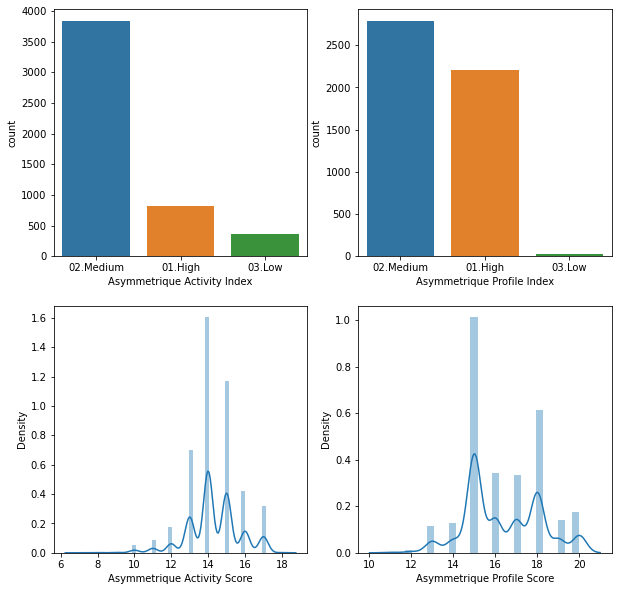

In [17]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize=(10,10))
sns.countplot(leads_df["Asymmetrique Activity Index"], ax = axs[0][0])
sns.countplot(leads_df["Asymmetrique Profile Index"], ax = axs[0][1])
sns.distplot(leads_df["Asymmetrique Activity Score"], ax = axs[1][0])
sns.distplot(leads_df["Asymmetrique Profile Score"], ax = axs[1][1])
plt.show()

##### Inference
As the distribution is varied and these features are the ones that are provided by the sales rep, hence this features would not not be helpful in modelling, hence dropping these columns would be the best action. 

In [18]:
leads_df.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"], axis =1, inplace = True)

In [19]:
# Check the Null percentage of each columns
round((leads_df.isnull().sum()/len(leads_df.index))*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

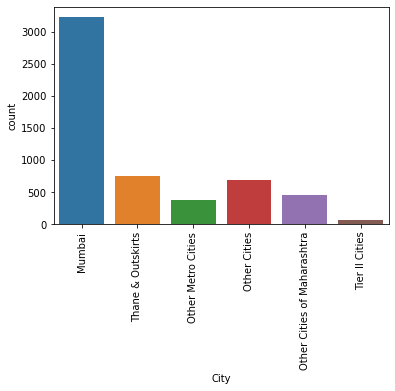

In [20]:
#Check the value counts in Column City
sns.countplot(leads_df["City"])
plt.xticks(rotation = 90)
plt.show()

In [21]:
# As the maximum value is Mumbai, so replacing the null values with 'Mumbai'
leads_df["City"].replace(np.nan,"Mumbai", inplace = True)

In [22]:
# Check the Null percentage of each columns
round((leads_df.isnull().sum()/len(leads_df.index))*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### Inspecting columns with null percentage of 30 to 39

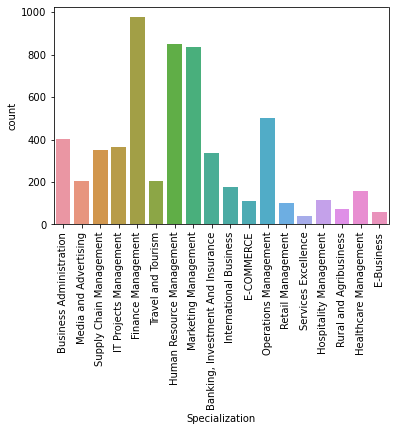

In [23]:
# Check the count of values in 'Specialization' column
sns.countplot(leads_df["Specialization"])
plt.xticks(rotation = 90)
plt.show()

In [24]:
leads_df["Specialization"].replace(np.nan, "Others", inplace = True)

In [25]:
# Check the Null percentage of each columns
round((leads_df.isnull().sum()/len(leads_df.index))*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

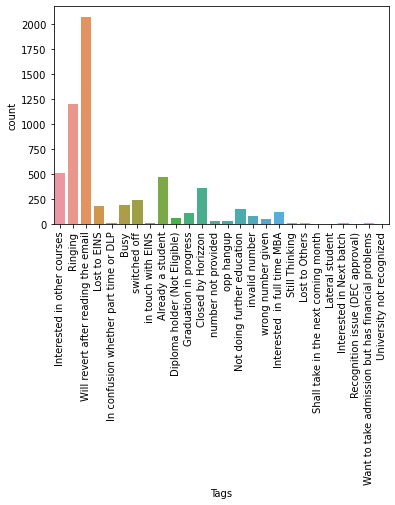

In [26]:
# Check the value counts in Tags Column
sns.countplot(leads_df["Tags"])
plt.xticks(rotation = 90)
plt.show()

In [27]:
(leads_df["Tags"].value_counts()/len(leads_df.index))*100

Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

#### Inference
Tags column is insignificant for our case study, as this input is provided by the sales representative after they contact the leads.

In [28]:
#Drop the tags column
leads_df.drop(["Tags"], axis = 1, inplace = True)

In [29]:
# Check the Null percentage of each columns
round((leads_df.isnull().sum()/len(leads_df.index))*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### Inspecting columns with null percentage of 20 to 29

In [30]:
leads_df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Germany                    4
South Africa               4
Nigeria                    4
Kuwait                     4
Sweden                     3
Bangladesh                 2
Netherlands                2
China                      2
Asia/Pacific Region        2
Uganda                     2
Ghana                      2
Philippines                2
Belgium                    2
Italy                      2
Indonesia                  1
Switzerland                1
Liberia                    1
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia      

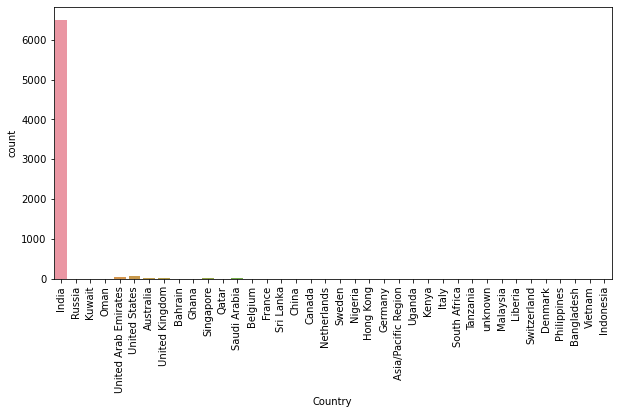

In [31]:
# Check count of values in Column "Country"
plt.figure(figsize=(10,5))
sns.countplot(leads_df["Country"])
plt.xticks(rotation = 90)
plt.show()

In [32]:
# Checking the percentage if each value in the column
(leads_df["Country"].value_counts()/len(leads_df.index))*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Canada                   0.043290
Germany                  0.043290
South Africa             0.043290
Nigeria                  0.043290
Kuwait                   0.043290
Sweden                   0.032468
Bangladesh               0.021645
Netherlands              0.021645
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Ghana                    0.021645
Philippines              0.021645
Belgium                  0.021645
Italy                    0.021645
Indonesia                0.010823
Switzerland   

#### Inference
1. 70% of the values in column "Country" is "India", so we can impute the null values with "India"

In [33]:
# Imputing the null values with "India"
leads_df["Country"].replace(np.nan,"India", inplace = True)

In [34]:
# Checking the percentage if each value in the column
(leads_df["Country"].value_counts()/len(leads_df.index))*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Canada                   0.043290
Germany                  0.043290
South Africa             0.043290
Nigeria                  0.043290
Kuwait                   0.043290
Sweden                   0.032468
Bangladesh               0.021645
Netherlands              0.021645
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Ghana                    0.021645
Philippines              0.021645
Belgium                  0.021645
Italy                    0.021645
Indonesia                0.010823
Switzerland   

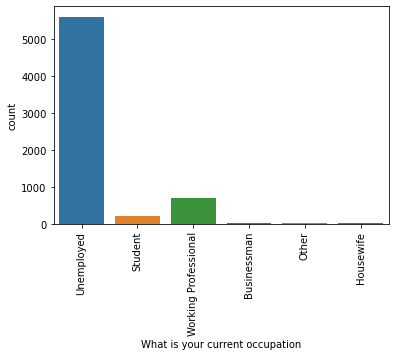

In [35]:
# Checking count of values in Column "What is your current occupation"
sns.countplot(leads_df["What is your current occupation"])
plt.xticks(rotation = 90)
plt.show()

In [36]:
# Checking the percentage if each value in the column
(leads_df["What is your current occupation"].value_counts()/len(leads_df.index))*100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

#### Inference
1. 60% of the values are "Unemployed"

In [37]:
# Imputing the null values with "Unemployed"
leads_df["What is your current occupation"].replace(np.nan, "Unemployed", inplace = True)

In [38]:
# Checking the percentage if each value in the column after imputation
(leads_df["What is your current occupation"].value_counts()/len(leads_df.index))*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [39]:
# Check the Null percentage of each columns
round((leads_df.isnull().sum()/len(leads_df.index))*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                           0.0
Specialization                                    0.0
What is your current occupation                   0.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

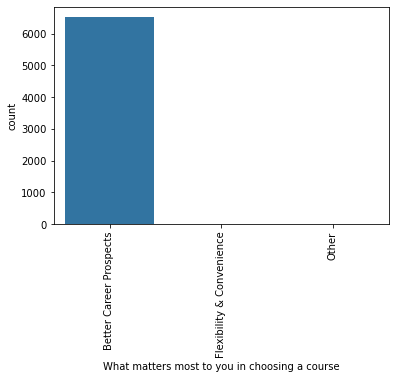

In [40]:
# Checking count of values in Column "What matters most to you in choosing a course"
sns.countplot(leads_df["What matters most to you in choosing a course"])
plt.xticks(rotation = 90)
plt.show()

In [41]:
# Checking the percentage if each value in the column "What matters most to you in choosing a course"
(leads_df["What matters most to you in choosing a course"].value_counts()/len(leads_df.index))*100

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

#### Inference
1. 70% of the value in column "What matters most to you in choosing a course" is "Better Career Prospects"

In [42]:
# Imputing the nulls values with "Better Career Prospects"
leads_df["What matters most to you in choosing a course"].replace(np.nan,"Better Career Prospects", inplace= True)

In [43]:
# Checking the percentage if each value in the column "What matters most to you in choosing a course" after imputation
(leads_df["What matters most to you in choosing a course"].value_counts()/len(leads_df.index))*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

#### Inspecting columns with null percentage of 19 or less

In [44]:
# Check the Null percentage of each columns
round((leads_df.isnull().sum()/len(leads_df.index))*100,1)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.4
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.5
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.5
Last Activity                                    1.1
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [45]:
# Checking the value counts in column "Page Views Per Visit"
(leads_df["Page Views Per Visit"].value_counts()/len(leads_df.index))*100

0.00    23.690476
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
2.13     0.010823
4.40     0.010823
6.67     0.010823
8.33     0.010823
2.45     0.010823
Name: Page Views Per Visit, Length: 114, dtype: float64

In [46]:
# Checking the value counts in column "Page Views Per Visit"
leads_df["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Density'>

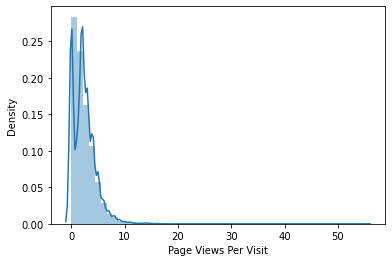

In [47]:
sns.distplot(leads_df["Page Views Per Visit"])

#### Inference 
1. No significant pattern in the value distribution in column "Page Views Per Visit". No value can be selected for imputation.

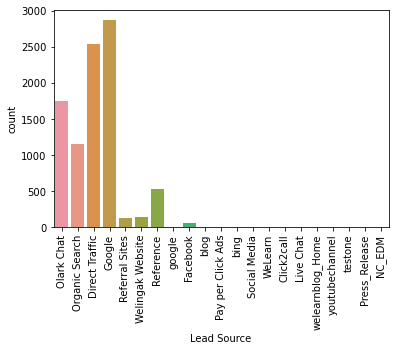

In [48]:
# Checking the value counts in "Lead Source"
sns.countplot(leads_df["Lead Source"])
plt.xticks(rotation = 90)
plt.show()

#### Note
Category "google" appears twice due to different cases

In [49]:
# Changing all the values to lower case
leads_df["Lead Source"] = leads_df["Lead Source"].apply(lambda x: str(x).lower())

In [50]:
leads_df["Lead Source"].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
nan                    36
bing                    6
click2call              4
social media            2
press_release           2
live chat               2
welearn                 1
pay per click ads       1
blog                    1
nc_edm                  1
welearnblog_home        1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

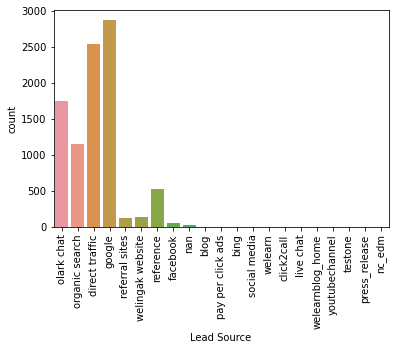

In [51]:
# Checking the value counts in "Lead Source" after standardizing the case
sns.countplot(leads_df["Lead Source"])
plt.xticks(rotation = 90)
plt.show()

In [52]:
# Checking the percentage of each value in column "Lead Source"
(leads_df["Lead Source"].value_counts()/len(leads_df.index))*100

google               31.093074
direct traffic       27.521645
olark chat           18.993506
organic search       12.489177
reference             5.779221
welingak website      1.536797
referral sites        1.352814
facebook              0.595238
nan                   0.389610
bing                  0.064935
click2call            0.043290
social media          0.021645
press_release         0.021645
live chat             0.021645
welearn               0.010823
pay per click ads     0.010823
blog                  0.010823
nc_edm                0.010823
welearnblog_home      0.010823
testone               0.010823
youtubechannel        0.010823
Name: Lead Source, dtype: float64

In [53]:
# replacing category nan to np.nan
leads_df["Lead Source"].replace("nan", np.nan, inplace = True)

In [54]:
# Checking the percentage of each value in column "Lead Source"
(leads_df["Lead Source"].value_counts()/len(leads_df.index))*100

google               31.093074
direct traffic       27.521645
olark chat           18.993506
organic search       12.489177
reference             5.779221
welingak website      1.536797
referral sites        1.352814
facebook              0.595238
bing                  0.064935
click2call            0.043290
press_release         0.021645
social media          0.021645
live chat             0.021645
welearn               0.010823
pay per click ads     0.010823
blog                  0.010823
nc_edm                0.010823
welearnblog_home      0.010823
testone               0.010823
youtubechannel        0.010823
Name: Lead Source, dtype: float64

#### Inference
1. No significant pattern in the value distribution in column "Lead Source". No value can be selected for imputation.

<AxesSubplot:xlabel='TotalVisits', ylabel='Density'>

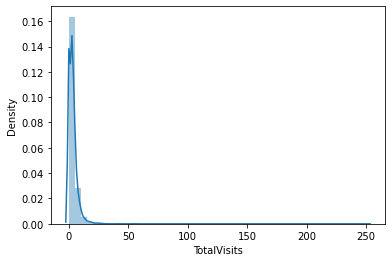

In [55]:
#Checking the column "TotalVisits"
sns.distplot(leads_df["TotalVisits"])

In [56]:
# Checking the percentage of each value in column "TotalVisits"
(leads_df["TotalVisits"].value_counts()/len(leads_df.index))*100

0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
25.0      0.054113
24.0      0.054113
27.0      0.054113
22.0      0.032468
28.0      0.021645
29.0      0.021645
26.0      0.021645
115.0     0.010823
41.0      0.010823
55.0      0.010823
251.0     0.010823
141.0     0.010823
32.0      0.010823
42.0      0.010823
74.0      0.010823
43.0      0.010823
30.0      0.010823
54.0      0.010823
Name: TotalVisits, dtype: float64

#### Inference
1. No significant pattern in the value distribution in column "TotalVisits". No value can be selected for imputation.

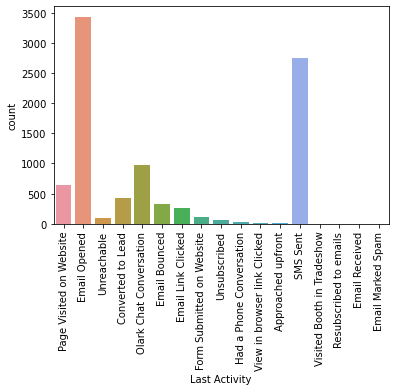

In [57]:
#Checking the column "Last Activity"
sns.countplot(leads_df["Last Activity"])
plt.xticks(rotation = 90)
plt.show()

In [58]:
# Checking the percentage of each value in column "Last Activity"
(leads_df["Last Activity"].value_counts()/len(leads_df.index))*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

#### Inference
1. No significant pattern in the value distribution in column "Last Activity". No value can be selected for imputation.
2. "Last Activity" is the column available after the sales representative communicates with lead, which is not significant for our model building.

#### Actions:
1. Drop column "Last Activity" as it is insignificant for our model building.
2. Drop the null values from the columns "TotalVisits", "Lead Source", "Page Views Per Visit", as there are no suitable value for imputation and the null percentage is lower than 2%.


In [59]:
#Dropping column "Last Activity"
leads_df.drop(["Last Activity"], inplace = True, axis = 1)

In [60]:
# Dropping the null values
leads_df.dropna(inplace = True)

In [61]:
# Check the Null percentage of each columns
round((leads_df.isnull().sum()/len(leads_df.index))*100,1)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

#### Inference
1. No null values in any column
2.  "Last Notable Activity" is the column available after the sales representative communicates with lead, which is not significant for our model building.

#### Actions:
Drop column "Last Notable Activity" as it is insignificant for our model building.

In [62]:
leads_df.drop(["Last Notable Activity"], axis = 1, inplace = True)

In [63]:
# Check the Null percentage of each columns
round((leads_df.isnull().sum()/len(leads_df.index))*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [64]:
#Checking the shape of the leads_df after cleaning
leads_df.shape

(9074, 27)

In [65]:
# Checking the percentage of the rows and columns retained in cleaning
# Shape of dataframe before cleaning: (9240, 37)
rows_retained = round((leads_df.shape[0]/9240)*100,2)
cols_retained = round((leads_df.shape[1]/37)*100,2)
print("% of rows retained    : "+ str(rows_retained)+"%")
print("% of columns retained : "+ str(cols_retained)+"%")

% of rows retained    : 98.2%
% of columns retained : 72.97%


#### Data Cleaning Result:
1. 98.2% of rows retained after data cleaning
2. 72.97% of columns retained after data claning

In [66]:
# Saving the cleaned data to csv
leads_df.to_csv("leads_data_cleaned.csv")

# Step 3: Exploratory Data Analysis (EDA)

In [67]:
# Check the value_counts for each column
for i in leads_df.columns:
    if type(leads_df[i] == object):
        print(leads_df[i].value_counts())
    print("====================================================================")

ef7c2fcd-318e-45aa-a201-5a7fe5f0f1b4    1
1896c6af-234d-4dd8-a00e-673dcacc2c2c    1
d292e6c8-0c45-42b0-8699-c06b9a6f0fde    1
db7df067-c985-4d24-80af-c72990c68904    1
f66151d2-e0b3-4658-a801-4c097ef5dbf2    1
                                       ..
8b366481-fab0-42c7-bfa2-e8ebccc070ae    1
a5c824ad-efb2-4d8a-b555-215ea9ed37d2    1
fbeec124-34b9-4282-876b-57f87d99845a    1
3d5aba1a-eca8-4c73-ba15-4ecf4e074fff    1
b0426acd-24a3-4271-b061-3c93b21016dc    1
Name: Prospect ID, Length: 9074, dtype: int64
655360    1
609951    1
619195    1
600768    1
631489    1
         ..
585039    1
648526    1
625995    1
580937    1
608255    1
Name: Lead Number, Length: 9074, dtype: int64
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      12

#### Inferences
1. Columns with Binary Categorical Values(Yes/No)(14):<br>
    =>Do Not Email<br>
    =>Do Not Call<br>
    =>Search<br>
    =>Magazine<br>
    =>Newspaper Article<br>
    =>X Education Forums<br>
    =>Newspaper<br>
    =>Digital Advertisement<br>
    =>Through Recommendations<br>
    =>Receive More Updates About Our Courses<br>
    =>Update me on Supply Chain Content<br>
    =>Get updates on DM Content<br>
    =>I agree to pay the amount through cheque<br>
    =>A free copy of Mastering The Interview<br>
2. These variable can be encoded to 0/1.<br>
1 equivalent to "Yes"<br>
0 equivalent to "No"

In [68]:
# Keeping all the binary categorical columns in a list "binary_categorical_vars"
binary_categorical_vars = ["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]

In [69]:
# Viewing the binary categorical columns
leads_df[binary_categorical_vars]

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
9236,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
9237,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes
9238,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [70]:
# Encoding the Yes, No vales to 1, 0 respectively

# Defining the binary_map function
def binary_map(x):
    return x.map({"Yes" : 1,"No" : 0,})

# Applying encoding in leads_df
leads_df[binary_categorical_vars] = leads_df[binary_categorical_vars].apply(binary_map)

In [71]:
# Viewing the binary categorical columns after encoding
leads_df[binary_categorical_vars]

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9237,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9238,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
# Viewing the summary of the all the binary categorical values
leads_df[binary_categorical_vars].describe()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,0.078907,0.000220,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,0.269608,0.014845,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [73]:
# Keep all the column names in a list
all_vars = list(leads_df.columns)

In [74]:
# Remove all binary categorical column names from all_vars
for i in binary_categorical_vars:
    if i in all_vars:
        all_vars.remove(i)

In [75]:
# Check the values in all_vars
all_vars

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City']

In [76]:
# Check length of the all_vars
len(all_vars)

13

In [77]:
# Keep all multi-level categorical variables in a  list
multi_category_vars = ['Lead Origin','Lead Source','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','City']

In [78]:
# View all multi-level categorical variables
leads_df[multi_category_vars]

,Lead Origin,Lead Source,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City
0,API,olark chat,India,Others,Unemployed,Better Career Prospects,Mumbai
1,API,organic search,India,Others,Unemployed,Better Career Prospects,Mumbai
2,Landing Page Submission,direct traffic,India,Business Administration,Student,Better Career Prospects,Mumbai
3,Landing Page Submission,direct traffic,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai
4,Landing Page Submission,google,India,Others,Unemployed,Better Career Prospects,Mumbai
...,...,...,...,...,...,...,...
9235,Landing Page Submission,direct traffic,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,Mumbai
9236,Landing Page Submission,direct traffic,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai
9237,Landing Page Submission,direct traffic,India,Business Administration,Unemployed,Better Career Prospects,Mumbai
9238,Landing Page Submission,google,India,Human Resource Management,Unemployed,Better Career Prospects,Other Metro Cities


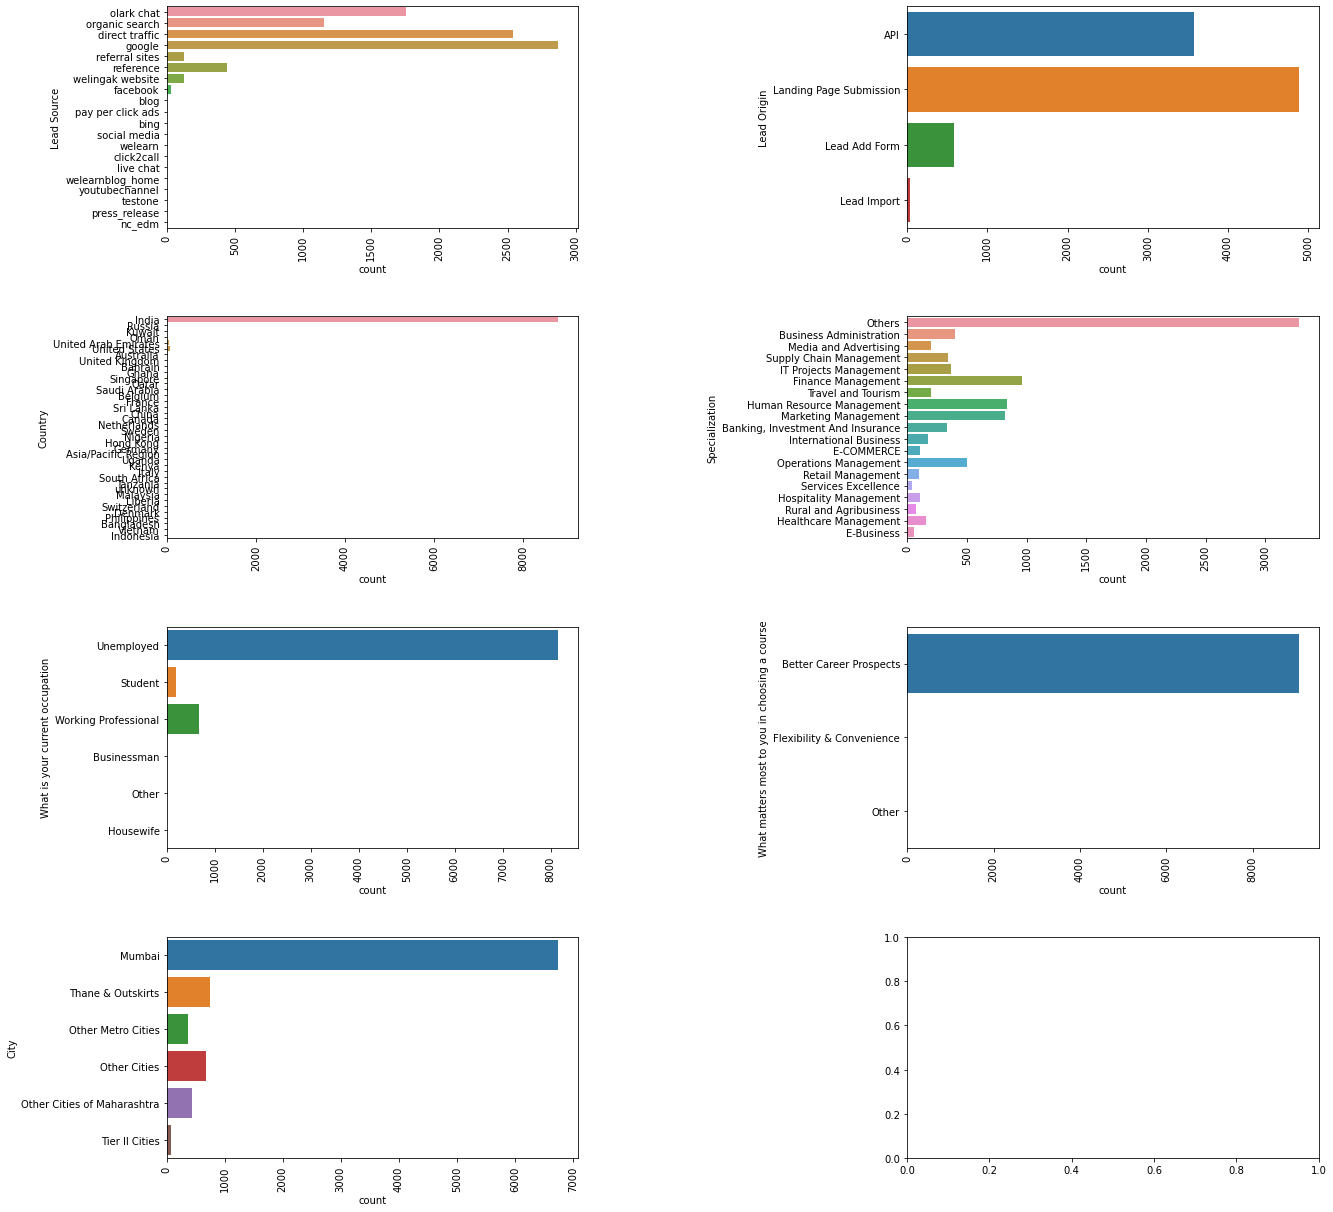

In [79]:
# Check the multilvel categorical variables
fig, axs =  plt.subplots(nrows = 4, ncols = 2, figsize = (20,20))

############################################################################################################
# plot the bar graph for counts of the "Lead Origin"
sns.countplot(y = leads_df["Lead Source"], ax = axs[0][0], orient = "v")
axs[0,0].tick_params(axis='x', rotation = 90)

############################################################################################################
# plot the bar graph for counts of the "Lead Source"
sns.countplot(y = leads_df["Lead Origin"], ax = axs[0][1], orient = "h")
axs[0,1].tick_params(axis='x', rotation = 90)

############################################################################################################
# plot the bar graph for counts of the "Country"
sns.countplot(y = leads_df["Country"], ax = axs[1][0], orient = "h")
axs[1,0].tick_params(axis='x', rotation = 90)

############################################################################################################
# plot the bar graph for counts of the "Specialization"
sns.countplot(y = leads_df["Specialization"], ax = axs[1][1], orient = "h")
axs[1,1].tick_params(axis='x', rotation = 90)

############################################################################################################
# plot the bar graph for counts of the "What is your current occupation"
sns.countplot(y = leads_df["What is your current occupation"], ax = axs[2][0], orient = "h")
axs[2,0].tick_params(axis='x', rotation = 90)

############################################################################################################
# plot the bar graph for counts of the "What matters most to you in choosing a course"
sns.countplot(y = leads_df["What matters most to you in choosing a course"], ax = axs[2][1], orient = "h")
axs[2,1].tick_params(axis='x', rotation = 90)

############################################################################################################
# plot the bar graph for counts of the "City"
sns.countplot(y = leads_df["City"], ax = axs[3][0], orient = "h")
axs[3,0].tick_params(axis='x', rotation = 90)

############################################################################################################
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)
############################################################################################################
plt.show()

In [80]:
# Calculate present Lead conversion rate
leads_df["Converted"].sum()/len(leads_df.index)*100

37.85541106458012

#### Current Lead conversion rate is 37.85%

In [81]:
# Binary categorical variables
binary_categorical_vars

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [82]:
# Multi-level categorical variables and  others
all_vars

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City']

### Univariate Analysis

#### Variables : Do Not Email, Do Not Call

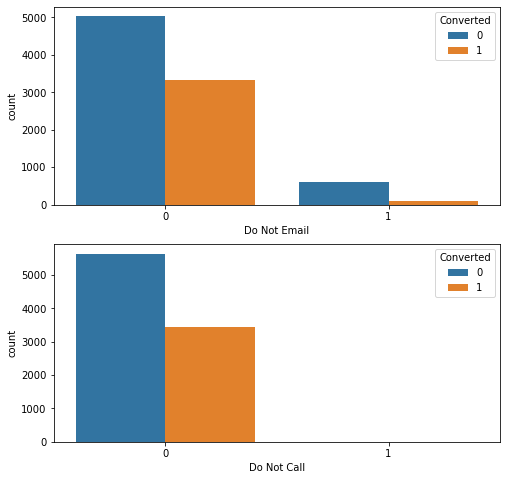

In [83]:
# Plot the relation between Converted and "Do Not call", "Do Not Email" variables
fig, axs = plt.subplots(nrows = 2, figsize = (8,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1])
plt.show()

#### Inference:
1. It is observed that most of the leads have provided their preference as "Do not Call", "Do not Email". But still there are significant lead conversion rate.

#### Variables : Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement
These variables indicate whether the customer had seen the ad in any of the above listed items.

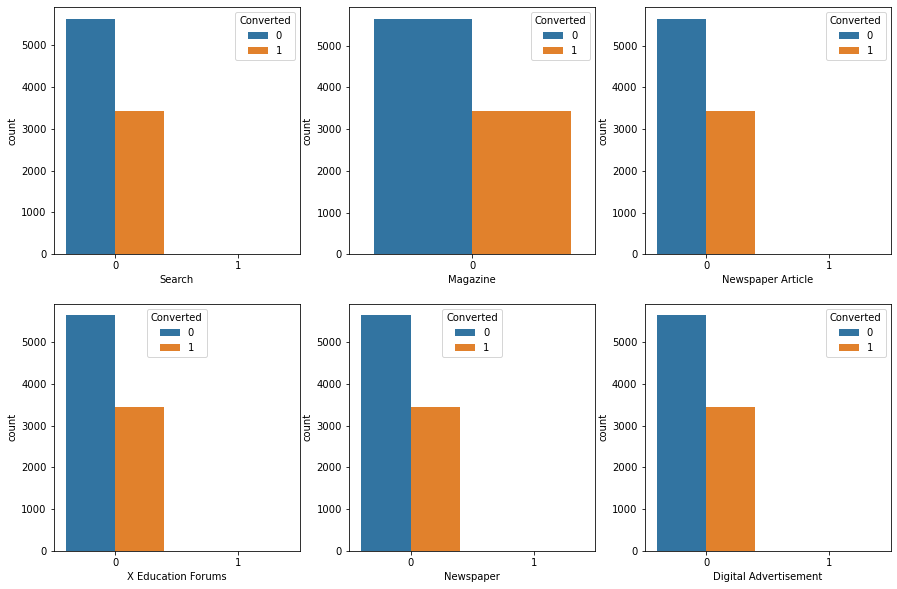

In [84]:
# Plot the relation between Converted and variables-Search, Magazine, Newspaper Article, X Education Forums,
# Newspaper, Digital Advertisement
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
sns.countplot(x = "Search", hue = "Converted", data = leads_df, ax = axs[0][0])
sns.countplot(x = "Magazine", hue = "Converted", data = leads_df, ax = axs[0][1])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df, ax = axs[0][2])
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df, ax = axs[1][0])
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df, ax = axs[1][1])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df, ax = axs[1][2])
plt.show()

#### Inference
The variables which tells whether the leads had seen the ad in any of the above channels are not very helpful in our model building as mostly the leads have selected that they haven't seen the ad but still have significant conversion rate 

#### Variables : Through Recommendations
These variables indicate whether the customer had come from recommendation or not

<AxesSubplot:xlabel='Through Recommendations', ylabel='count'>

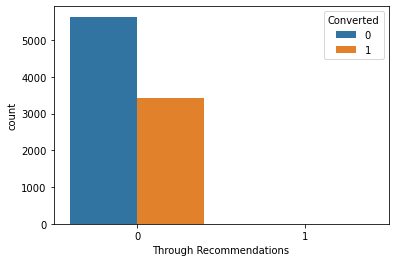

In [85]:
# Plot the relation between Converted and Through Recommendations
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df)

#### Inference
The variables which tells whether the leads had come through recommendations are not very helpful in our model building as mostly the leads have not come through recommendation but still have significant conversion rate.

#### Variables : Receive More Updates About Our Courses, Update me on Supply Chain Content,Get updates on DM Content, I agree to pay the amount through cheque, A free copy of Mastering The Interview

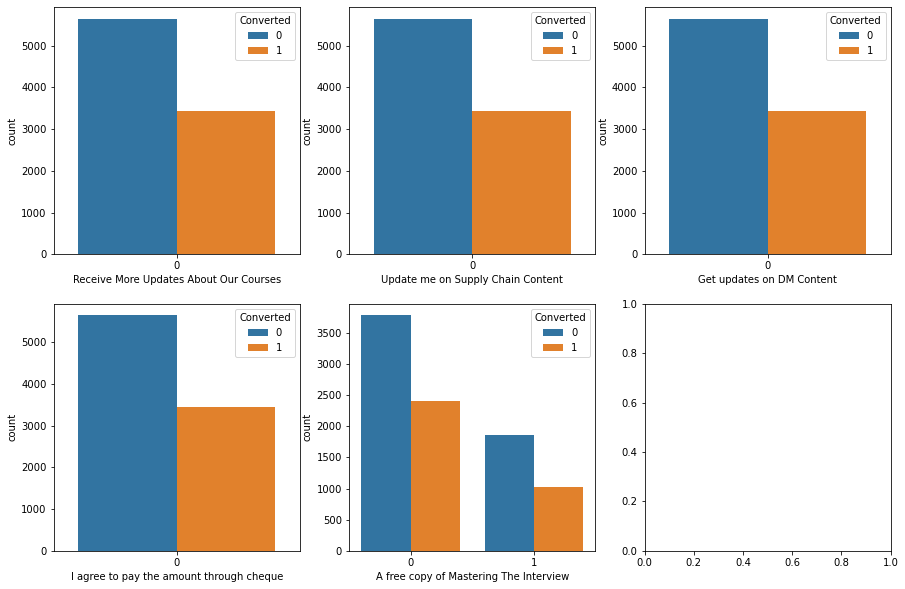

In [86]:
# Plot the relation between Converted and Receive More Updates About Our Courses,
# Update me on Supply Chain Content,Get updates on DM Content,
# I agree to pay the amount through cheque, A free copy of Mastering The Interviews
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df, ax = axs[0][0])
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads_df, ax = axs[0][1])
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_df, ax = axs[0][2])
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_df, ax = axs[1][0])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df, ax = axs[1][1])
plt.show()

#### Inference
1. "Receive More Updates About Our Courses", "Update me on Supply Chain Content","Get updates on DM Content", "I agree to pay the amount through cheque" are not very helpful for deciding the lead conversion due to single value.
2. "A free copy of Mastering The Interview", lead conversion percentage is higher for leads who said "No" to "A free copy of Mastering The Interview". But conclusive can be said in this case.

In [87]:
all_vars

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City']

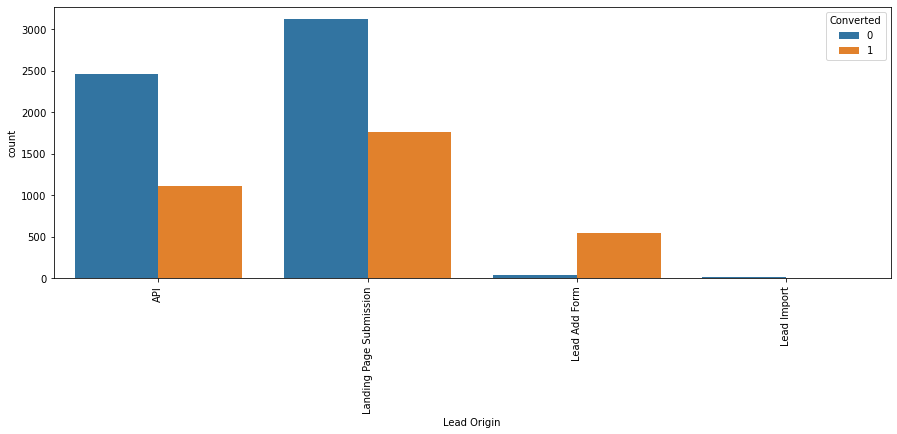

In [88]:
# Plot the relation between Converted and Lead Origin
plt.figure(figsize = (15,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. Lead Conversion is highest for the leads coming from "Landing Page Submission".
2. Lead Conversion is second highest for the leads coming from "API".
3. Lead Conversion is high for the leads coming from "Lead Add Form" but overall less number of leads coming from this channel.

### Recommendation:
1. Improve or work more on the "Landing Page Submission"
2. Improve or work more on the "API"
3. Improve or work more on the "Lead Add Form"

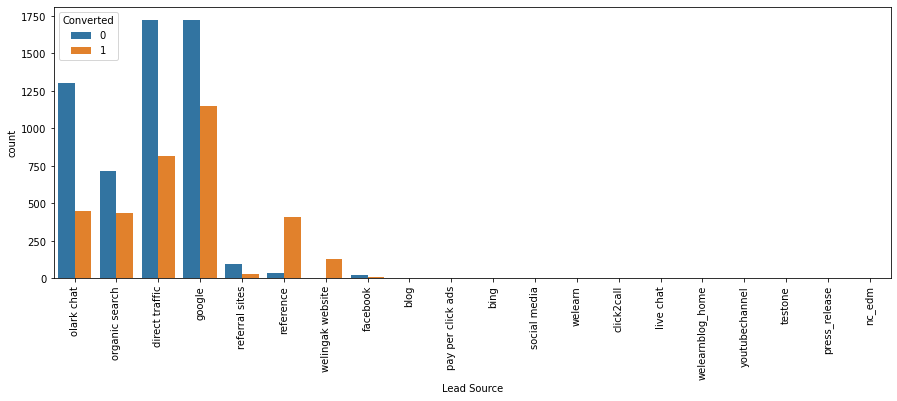

In [89]:
# Plot the relation between Converted and Lead Source
plt.figure(figsize = (15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
There are many other lead sources whose counts are very low. There club them together to Category "Others"

In [90]:
# Clubbing all the non significant categories to "Others"
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['click2call', 'live chat', 'nc_edm', 'pay per click ads', 'press_release',
  'social media', 'welearn', 'bing', 'blog', 'testone', 'welearnblog_home', 'youtubechannel'], 'Others')

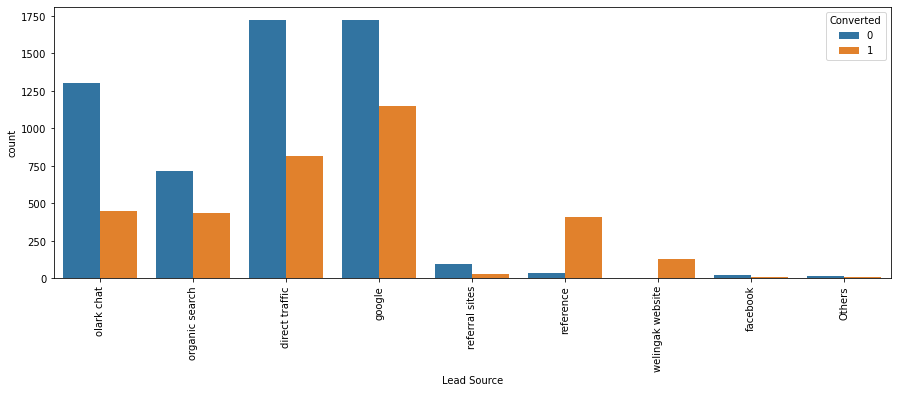

In [91]:
# Plot the relation between Converted and Lead Source
plt.figure(figsize = (15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. Leads from sources such as "google", direct traffic, organic search and olark chat must focussed on.
2. High Number of Leads coming from Source "Olark chat", but lead conversion is low.

### Recommendation
1. Leads from Olark chat should be focussed as many leads from this source. 

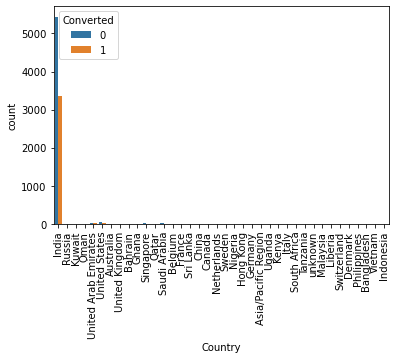

In [92]:
# Plot the relation between Converted and Country
sns.countplot(x = "Country", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. Highest Number of leads are from India and the conversion rate is also high.

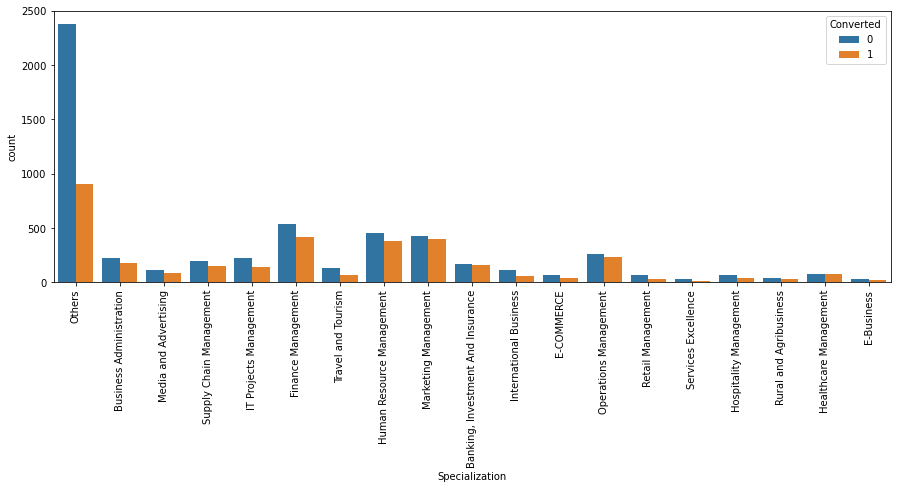

In [93]:
# Plot the relation between Converted and Specialization
plt.figure(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. Highest Number of leads have specified their Specilization as Others.
2. Nothing Conclusive can be said in this case.

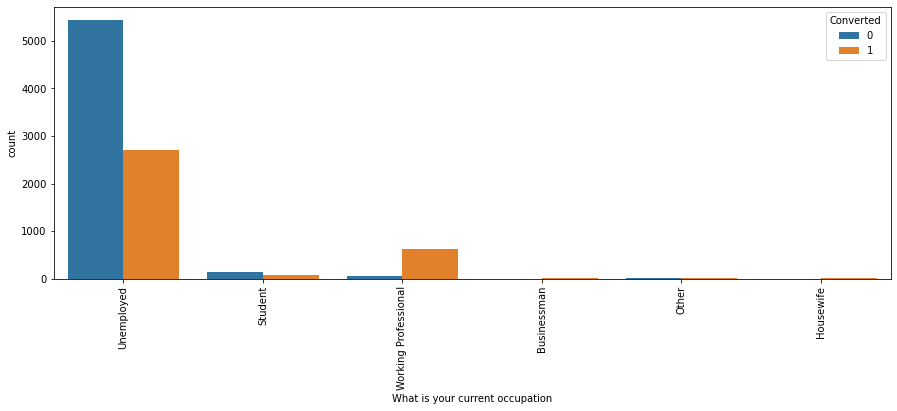

In [94]:
# Plot the relation between Converted and What is you Current Occupation
plt.figure(figsize = (15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. Highest Number of leads are Unemployed.
2. Working professional has high lead converstion rate

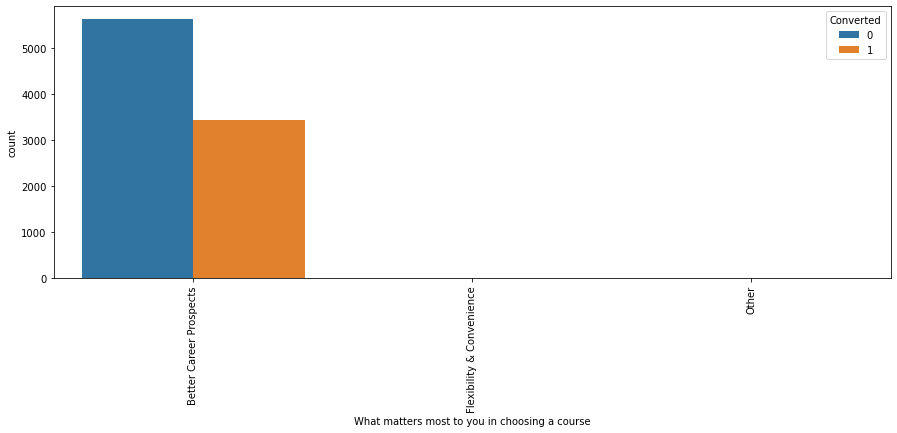

In [95]:
# Plot the relation between Converted and variable "What Matters most to most in choosing a course"
plt.figure(figsize = (15,5))
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
1. Highest Number of leads value "Better Career Prospects" for choosing their course.

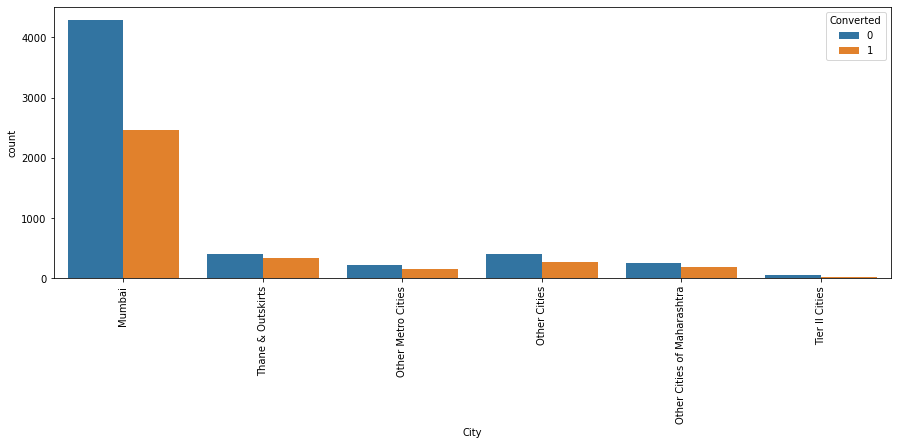

In [96]:
# Plot the relation between Converted and City
plt.figure(figsize = (15,5))
sns.countplot(x = "City", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

In [97]:
all_vars

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City']

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

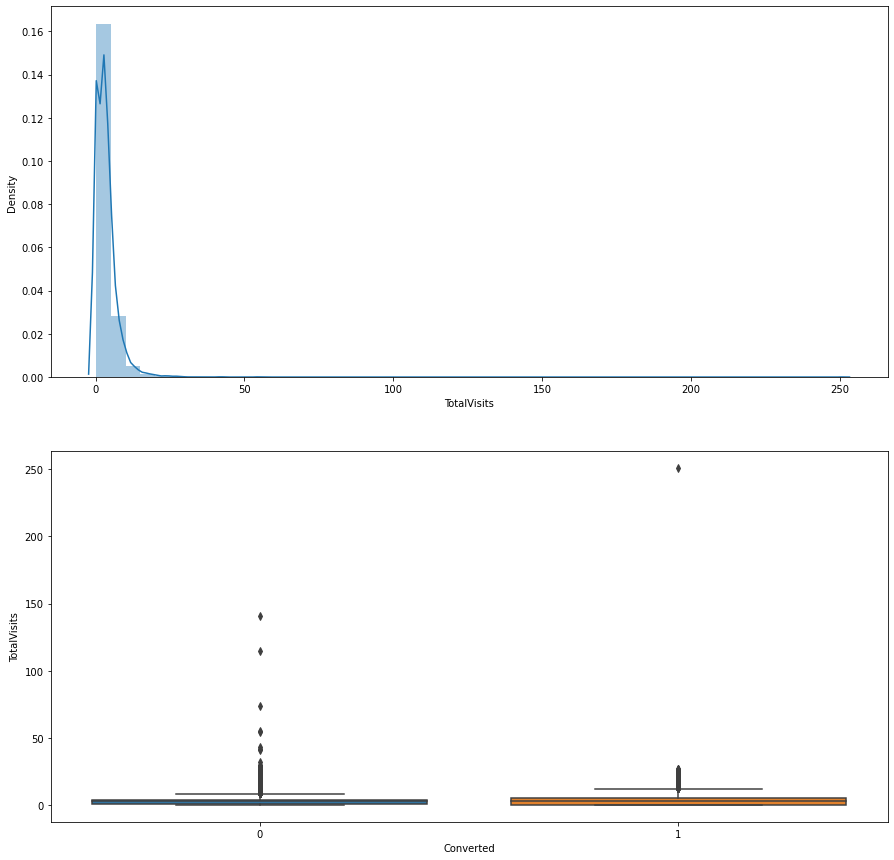

In [98]:
# Plot the relation between TotalVisits and Converted
fig, axs =  plt.subplots(figsize = (15,15), nrows = 2)
sns.distplot(leads_df["TotalVisits"], ax = axs[0])
sns.boxplot(y = leads_df["TotalVisits"], x = leads_df["Converted"], ax = axs[1])

#### Inference
1. Nothing conclusive can be said in this case as the median and distribution is alsmost same for converted and not converted.

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

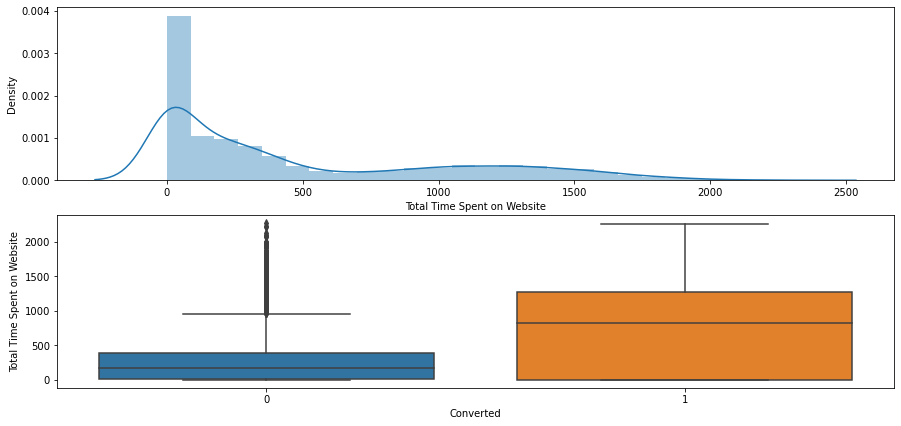

In [99]:
# Plot the relation between "Total Time Spent on Website" and Converted
fig, axs =  plt.subplots(figsize = (15,7), nrows = 2)
sns.distplot(leads_df["Total Time Spent on Website"], ax = axs[0])
sns.boxplot(y = leads_df["Total Time Spent on Website"], x = leads_df["Converted"], ax = axs[1])

#### Inference
Leads spending more time on the weblise are more likely to be converted.

### Recommendation
Website should be made more engaging to make leads spend more time.

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

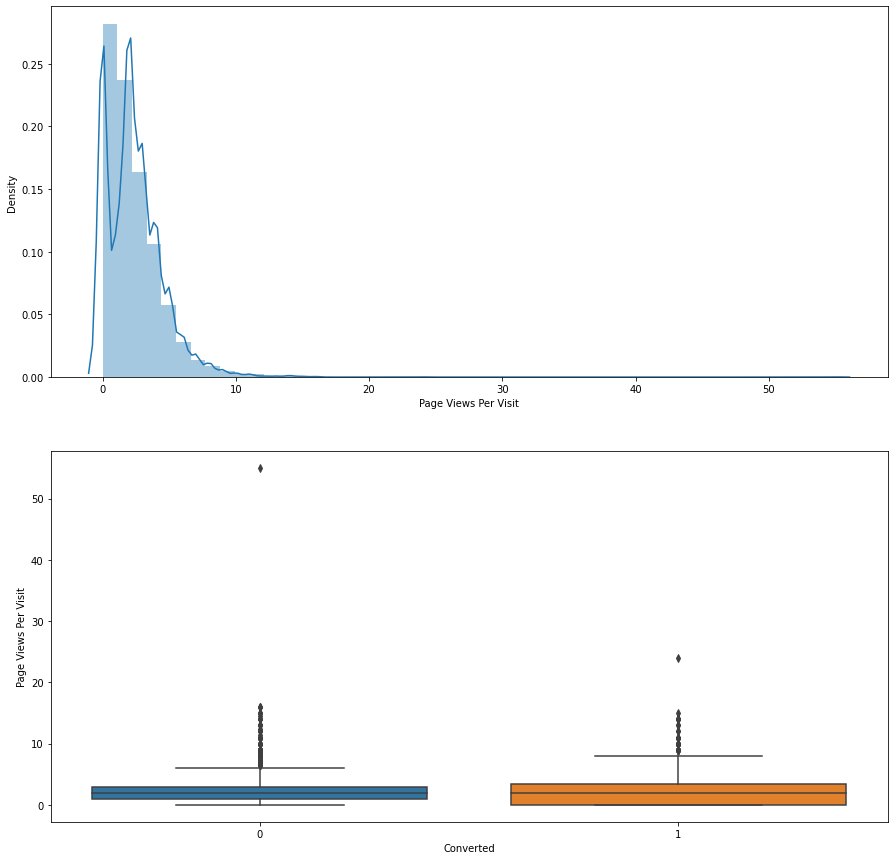

In [100]:
# Plot the relation between "Page Views Per Visit" and Converted
fig, axs =  plt.subplots(figsize = (15,15), nrows = 2)
sns.distplot(leads_df["Page Views Per Visit"], ax = axs[0])
sns.boxplot(y = leads_df["Page Views Per Visit"], x = leads_df["Converted"] , ax = axs[1])

#### Inference
1. Nothing conclusive can be said in this case as the median and distribution is alsmost same for converted and not converted.

### Drop the variables which are not helping much in model creation

In [101]:
leads_df = leads_df.drop(['Lead Number','Search','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Do Not Call',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','What matters most to you in choosing a course'],1)

In [102]:
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,olark chat,0,0,0.0,0,0.0,Others,Unemployed,Mumbai
1,2a272436-5132-4136-86fa-dcc88c88f482,API,organic search,0,0,5.0,674,2.5,Others,Unemployed,Mumbai
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,direct traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,direct traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,google,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai


In [103]:
leads_df.shape

(9074, 11)

In [104]:
leads_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

# Step 4: Data Preparation

#### Create dummy varibles for the mult-level categorical variables (One hot encoding)

In [105]:
# multi-level category variables
multi_category_vars = ['Lead Origin','Lead Source','Specialization','What is your current occupation','City']

In [106]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_vars = pd.get_dummies(leads_df[multi_category_vars], drop_first=True)
dummy_vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [107]:
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy_vars], axis=1)
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,olark chat,0,0,0.0,0,0.0,Others,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,organic search,0,0,5.0,674,2.5,Others,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,direct traffic,0,1,2.0,1532,2.0,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,direct traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,google,0,1,2.0,1428,1.0,Others,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [108]:
#Dropping the original multi-level categorical columns
leads_df = leads_df.drop(multi_category_vars, axis =1)

In [109]:
#Check the information for the dataframe 
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Do Not Email                                          9074 non-null   int64  
 2   Converted                                             9074 non-null   int64  
 3   TotalVisits                                           9074 non-null   float64
 4   Total Time Spent on Website                           9074 non-null   int64  
 5   Page Views Per Visit                                  9074 non-null   float64
 6   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 8   Lead Origin_Lead Import                               9074

In [110]:
# Check shape of the new leads_df
leads_df.shape

(9074, 45)

In [111]:
leads_df.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_direct traffic,Lead Source_facebook,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.378554,3.456028,482.887481,2.370151,0.538351,0.064029,0.003306,0.280251,0.003416,...,0.000992,0.001653,0.022702,0.899162,0.074609,0.074939,0.049151,0.041547,0.082103,0.008155
std,0.269608,0.485053,4.858802,545.256560,2.160871,0.498554,0.244818,0.057407,0.449147,0.058353,...,0.031480,0.040627,0.148961,0.301130,0.262774,0.263308,0.216196,0.199563,0.274536,0.089942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,246.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,5.000000,922.750000,3.200000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 4: Model Creation

In [112]:
# Initilize the x, y variables
x = leads_df.drop(["Prospect ID","Converted"], axis = 1)
y = leads_df["Converted"]

In [113]:
# View x 
x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [114]:
# View y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Train-Test split

In [115]:
from sklearn.model_selection import train_test_split

# Create a train and test data. Train-size = 70%, Test-size 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature Scaling

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


#### Inference
1. Variable 'Total Time Spent on Website' has very high variance and hence

In [118]:
scaler = StandardScaler()

# Standardize the variable 'Total Time Spent on Website'
x_train[['Total Time Spent on Website']] = scaler.fit_transform(x_train[['Total Time Spent on Website']])

x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,2.0,-0.160255,2.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1012,1,2.0,-0.540048,2.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9226,0,0.0,-0.888650,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,2.0,1.643304,2.0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
7987,0,5.0,2.017593,2.5,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


### Model Building

In [119]:
import statsmodels.api as sm

In [120]:
# Fit a logistic regression model on train data
logm1 = sm.GLM(y_train, sm.add_constant(x_train), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2920.3
Date:                Wed, 01 Jun 2022   Deviance:                       5840.6
Time:                        18:35:34   Pearson chi2:                 6.80e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1872      1.263      0.940      0.347      -1.289       3.663
Do Not Email                                            -1.4493      0.166     -8.750      0.000      -1.774      -1.125
TotalVisits                                              0.0243      0.009      2.747      0.006       0.007       0.042
Total Time Spent on Website                              1.1188      0.039     28.954      0.000       1.043       1.194
Page Views Per Visit                                    -0.0200      0.023     -0.877      0.381      -0.065       0.025
Lead Origin_Landing Page Submission                     -0.8153      0.127     -6.399      0.000      -1.065      -0.566
Lead Origin_Lead Add Form                                1.7192      1.091      1.576      0.115      -0.418       3.857
Lead Origin_Lead Import                                 21.5553   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_direct traffic                              -0.5972      0.653     -0.915      0.360      -1.877       0.683
Lead Source_facebook                                   -20.9928   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_google                                      -0.2487      0.652     -0.382      0.703      -1.526       1.029
Lead Source_olark chat                                   0.5927      0.659      0.900      0.368      -0.699       1.884
Lead Source_organic search                              -0.3483      0.656     -0.531      0.595      -1.634       0.937
Lead Source_reference                                    1.7606      0.967      1.820      0.069      -0.135       3.657
Lead Source_referral sites                              -0.8512      0.727     -1.172      0.241      -2.275       0.573
Lead Source_welingak website                             4.2933      1.187      3.617      0.000       1.967       6.620
Specialization_Business Administration                  -0.3410      0.230     -1.480      0.139      -0.793       0.111
Specialization_E-Business                               -0.0554      0.433     -0.128      0.898      -0.905       0.794
Specialization_E-COMMERCE                                0.0199      0.335      0.059      0.953      -0.637       0.677
Specialization_Finance Management                       -0.2578      0.192     -1.342      0.180      -0.634       0.119
Specialization_Healthcare Management                    -0.3170      0.301     -1.054      0.292      -0.907       0.273
Specialization_Hospitality Management                   -0.7730      0.348     -2.222      0.026      -1.455      -0.091
Specialization_Human Resource Management                -0

### Feature Selection Using RFE

In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [122]:
x_train.shape

(6351, 43)

In [123]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,20)
rfe = rfe.fit(x_train, y_train) 

In [124]:
rfe.support_

array([ True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False,  True])

In [125]:
list(zip(x_train,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 21),
 ('Lead Source_google', True, 1),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_welingak website', True, 1),
 ('Specialization_Business Administration', False, 14),
 ('Specialization_E-Business', False, 9),
 ('Specialization_E-COMMERCE', False, 4),
 ('Specialization_Finance Management', False, 17),
 ('Specialization_Healthcare Management', False, 15),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 13),
 ('Specialization_IT Projects Management', False, 20),
 ('

In [126]:
significant_features = x_train.columns[rfe.support_]

In [127]:
x_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_facebook',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts'],
      dtype='object')

### Assess the model

In [128]:
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.3
Date:                Wed, 01 Jun 2022   Deviance:                       5864.6
Time:                        18:35:52   Pearson chi2:                 6.79e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8958      1.245      0.719      0.472      -1.545       3.337
Do Not Email                                            -1.4417      0.164     -8.788      0.000      -1.763      -1.120
Total Time Spent on Website                              1.1128      0.038     29.021      0.000       1.038       1.188
Lead Origin_Landing Page Submission                     -0.8303      0.126     -6.589      0.000      -1.077      -0.583
Lead Origin_Lead Add Form                                1.7948      1.091      1.645      0.100      -0.344       3.933
Lead Origin_Lead Import                                  0.7161      0.795      0.900      0.368      -0.843       2.275
Lead Source_direct traffic                              -0.4021      0.642     -0.627      0.531      -1.660       0.855
Lead Source_google                                      -0.0855      0.641     -0.133      0.894      -1.342       1.171
Lead Source_olark chat                                   0.7183      0.647      1.111      0.267      -0.549       1.986
Lead Source_organic search                              -0.1746      0.645     -0.271      0.787      -1.439       1.089
Lead Source_reference                                    1.7922      0.973      1.842      0.065      -0.115       3.699
Lead Source_referral sites                              -0.6441      0.716     -0.900      0.368      -2.048       0.759
Lead Source_welingak website                             4.3376      1.191      3.641      0.000       2.003       6.673
Specialization_Hospitality Management                   -0.4753      0.308     -1.542      0.123      -1.079       0.129
Specialization_Others                                   -1.1799      0.117    -10.049      0.000      -1.410      -0.950
What is your current occupation_Housewife               21.5815   1.51e+04      0.001      0.999   -2.95e+04    2.95e+04
What is your current occupation_Other                   -0.5152      1.287     -0.400      0.689      -3.038       2.008
What is your current occupation_Student                 -0.5927      1.088     -0.545      0.586      -2.726       1.541
What is your current occupation_Unemployed              -0.8328      1.068     -0.779      0.436      -2.927       1.261
What is your current occupation_Working Professional     1.8374      1.083      1.696      0.090      -0.286       3.960
City_Tier II Cities                                     -0.5490      0.416     -1.319      0.187      -1.365       0.267
========================================================================================================================
"""

In [129]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

3009    0.206225
1012    0.151623
9226    0.199789
4750    0.659082
7987    0.745683
1281    0.541717
2880    0.137804
4971    0.890520
7536    0.867631
1248    0.710557
dtype: float64

In [130]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20622546, 0.15162251, 0.19978892, 0.65908193, 0.74568348,
       0.54171704, 0.13780368, 0.89051964, 0.86763054, 0.7105568 ])

In [131]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.206225,3009
1,0,0.151623,1012
2,0,0.199789,9226
3,1,0.659082,4750
4,1,0.745683,7987


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [132]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.206225,3009,0
1,0,0.151623,1012,0
2,0,0.199789,9226,0
3,1,0.659082,4750,1
4,1,0.745683,7987,1


In [133]:
from sklearn import metrics

In [134]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3438  467]
 [ 875 1571]]


In [135]:
# Predicted     not_converted    converted
# Actual
# not_converted        3438      467
# converted           875       1571  

In [136]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7886946937490159


### Check VIFs

In [137]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[significant_features].columns
vif['VIF'] = [variance_inflation_factor(x_train[significant_features].values, i) for i in range(x_train[significant_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,287.21
6,Lead Source_google,100.97
5,Lead Source_direct traffic,87.82
3,Lead Origin_Lead Add Form,73.42
7,Lead Source_olark chat,59.74
9,Lead Source_reference,49.33
8,Lead Source_organic search,40.40
18,What is your current occupation_Working Professional,25.12
11,Lead Source_welingak website,15.91
2,Lead Origin_Landing Page Submission,8.04


In [139]:
# Drop the feature that has high VIF Value
significant_features = significant_features.drop('What is your current occupation_Unemployed',1)
significant_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_olark chat',
       'Lead Source_organic search', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [140]:
# Re-run the model after elimination of feature with high VIF
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.6
Date:                Wed, 01 Jun 2022   Deviance:                       5865.3
Time:                        18:35:54   Pearson chi2:                 6.80e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0675      0.649      0.104      0.917      -1.204       1.339
Do Not Email                                            -1.4426      0.164     -8.794      0.000      -1.764      -1.121
Total Time Spent on Website                              1.1126      0.038     29.024      0.000       1.037       1.188
Lead Origin_Landing Page Submission                     -0.8352      0.126     -6.630      0.000      -1.082      -0.588
Lead Origin_Lead Add Form                                1.7918      1.091      1.642      0.101      -0.347       3.930
Lead Origin_Lead Import                                  0.7124      0.795      0.896      0.370      -0.846       2.271
Lead Source_direct traffic                              -0.4011      0.642     -0.625      0.532      -1.659       0.857
Lead Source_google                                      -0.0855      0.641     -0.133      0.894      -1.342       1.171
Lead Source_olark chat                                   0.7160      0.647      1.107      0.268      -0.552       1.984
Lead Source_organic search                              -0.1720      0.645     -0.267      0.790      -1.436       1.092
Lead Source_reference                                    1.7941      0.973      1.844      0.065      -0.113       3.701
Lead Source_referral sites                              -0.6454      0.716     -0.901      0.367      -2.049       0.758
Lead Source_welingak website                             4.3390      1.191      3.642      0.000       2.004       6.674
Specialization_Hospitality Management                   -0.4762      0.308     -1.545      0.122      -1.080       0.128
Specialization_Others                                   -1.1828      0.117    -10.068      0.000      -1.413      -0.953
What is your current occupation_Housewife               22.4120   1.51e+04      0.001      0.999   -2.95e+04    2.95e+04
What is your current occupation_Other                    0.3156      0.722      0.437      0.662      -1.099       1.730
What is your current occupation_Student                  0.2395      0.212      1.129      0.259      -0.176       0.655
What is your current occupation_Working Professional     2.6692      0.185     14.393      0.000       2.306       3.033
City_Tier II Cities                                     -0.5497      0.416     -1.321      0.186      -1.365       0.266
========================================================================================================================
"""

In [141]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

3009    0.206344
1012    0.151128
9226    0.199736
4750    0.659140
7987    0.745715
1281    0.541590
2880    0.137798
4971    0.890916
7536    0.867628
1248    0.710599
dtype: float64

In [142]:
# Getting the predicted values on the train set
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20634418, 0.15112798, 0.19973561, 0.65914045, 0.74571459,
       0.54159018, 0.13779801, 0.89091606, 0.86762799, 0.71059899])

In [143]:
# Getting the final predicted values on the train set
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.206344,3009
1,0,0.151128,1012
2,0,0.199736,9226
3,1,0.659140,4750
4,1,0.745715,7987


In [144]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# check the predicted
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.206344,3009,0
1,0,0.151128,1012,0
2,0,0.199736,9226,0
3,1,0.659140,4750,1
4,1,0.745715,7987,1


In [145]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7886946937490159


In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[significant_features].columns
vif['VIF'] = [variance_inflation_factor(x_train[significant_features].values, i) for i in range(x_train[significant_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.34
9,Lead Source_reference,48.06
11,Lead Source_welingak website,15.54
2,Lead Origin_Landing Page Submission,7.84
5,Lead Source_direct traffic,5.23
13,Specialization_Others,4.57
6,Lead Source_google,4.36
7,Lead Source_olark chat,2.85
8,Lead Source_organic search,2.40
1,Total Time Spent on Website,1.31


In [147]:
significant_features = significant_features.drop('Lead Origin_Lead Add Form',1)
significant_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_reference', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [148]:
# Re-run the model after elimination of feature with high VIF
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2934.1
Date:                Wed, 01 Jun 2022   Deviance:                       5868.3
Time:                        18:35:56   Pearson chi2:                 6.80e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5817      0.538      1.081      0.280      -0.473       1.637
Do Not Email                                            -1.4473      0.164     -8.819      0.000      -1.769      -1.126
Total Time Spent on Website                              1.1115      0.038     29.025      0.000       1.036       1.187
Lead Origin_Landing Page Submission                     -0.8517      0.126     -6.780      0.000      -1.098      -0.605
Lead Origin_Lead Import                                  0.2013      0.709      0.284      0.776      -1.188       1.590
Lead Source_direct traffic                              -0.8981      0.534     -1.681      0.093      -1.945       0.149
Lead Source_google                                      -0.5858      0.533     -1.100      0.271      -1.630       0.458
Lead Source_olark chat                                   0.2128      0.538      0.395      0.693      -0.843       1.268
Lead Source_organic search                              -0.6720      0.537     -1.250      0.211      -1.725       0.381
Lead Source_reference                                    3.0777      0.577      5.334      0.000       1.947       4.209
Lead Source_referral sites                              -1.1480      0.620     -1.851      0.064      -2.364       0.068
Lead Source_welingak website                             5.6272      0.896      6.280      0.000       3.871       7.384
Specialization_Hospitality Management                   -0.4756      0.308     -1.543      0.123      -1.080       0.129
Specialization_Others                                   -1.1933      0.117    -10.170      0.000      -1.423      -0.963
What is your current occupation_Housewife               22.4122   1.51e+04      0.001      0.999   -2.95e+04    2.95e+04
What is your current occupation_Other                    0.3128      0.722      0.433      0.665      -1.102       1.728
What is your current occupation_Student                  0.2360      0.212      1.113      0.266      -0.180       0.652
What is your current occupation_Working Professional     2.6686      0.186     14.384      0.000       2.305       3.032
City_Tier II Cities                                     -0.5480      0.416     -1.317      0.188      -1.363       0.267
========================================================================================================================
"""

In [149]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

3009    0.206487
1012    0.149262
9226    0.199956
4750    0.658899
7987    0.745434
1281    0.540692
2880    0.137599
4971    0.892062
7536    0.867369
1248    0.710331
dtype: float64

In [150]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20648741, 0.14926184, 0.19995564, 0.65889938, 0.74543444,
       0.5406921 , 0.13759906, 0.8920617 , 0.86736852, 0.71033064])

In [151]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.206487,3009
1,0,0.149262,1012
2,0,0.199956,9226
3,1,0.658899,4750
4,1,0.745434,7987


In [152]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.206487,3009,0
1,0,0.149262,1012,0
2,0,0.199956,9226,0
3,1,0.658899,4750,1
4,1,0.745434,7987,1


In [153]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.788379782711384


In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[significant_features].columns
vif['VIF'] = [variance_inflation_factor(x_train[significant_features].values, i) for i in range(x_train[significant_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.84
4,Lead Source_direct traffic,5.23
12,Specialization_Others,4.57
5,Lead Source_google,4.36
6,Lead Source_olark chat,2.85
7,Lead Source_organic search,2.40
1,Total Time Spent on Website,1.31
16,What is your current occupation_Working Professional,1.23
8,Lead Source_reference,1.23
10,Lead Source_welingak website,1.16


In [155]:
significant_features = significant_features.drop('Lead Origin_Landing Page Submission',1)
significant_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_olark chat',
       'Lead Source_organic search', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [156]:
# Re-run the model after elimination of feature with high VIF
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3438,  467],
       [ 877, 1569]], dtype=int64)

In [157]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

3009    0.206645
1012    0.234899
9226    0.212731
4750    0.664784
7987    0.751375
1281    0.583497
2880    0.156222
4971    0.809714
7536    0.872093
1248    0.716323
dtype: float64

In [158]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20664488, 0.23489904, 0.21273079, 0.66478353, 0.75137465,
       0.58349749, 0.156222  , 0.80971356, 0.87209282, 0.71632343])

In [159]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.206645,3009
1,0,0.234899,1012
2,0,0.212731,9226
3,1,0.664784,4750
4,1,0.751375,7987


In [160]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.206645,3009,0
1,0,0.234899,1012,0
2,0,0.212731,9226,0
3,1,0.664784,4750,1
4,1,0.751375,7987,1


In [161]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7896394268619115


In [162]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[significant_features].columns
vif['VIF'] = [variance_inflation_factor(x_train[significant_features].values, i) for i in range(x_train[significant_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_Others,2.52
5,Lead Source_olark chat,2.10
4,Lead Source_google,1.34
1,Total Time Spent on Website,1.30
15,What is your current occupation_Working Professional,1.21
7,Lead Source_reference,1.20
6,Lead Source_organic search,1.17
3,Lead Source_direct traffic,1.16
0,Do Not Email,1.12
9,Lead Source_welingak website,1.10


In [163]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3443,  462],
       [ 874, 1572]], dtype=int64)

In [164]:
# Actual/Predicted     not_converted    converted
        # not_converted        3443      462
        # converted            874       1572  

In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7896394268619115

In [166]:
significant_features = significant_features.drop('What is your current occupation_Housewife',1)
significant_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_olark chat',
       'Lead Source_organic search', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [167]:
# Re-run the model after elimination of feature with high VIF
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2961.1
Date:                Wed, 01 Jun 2022   Deviance:                       5922.2
Time:                        18:35:58   Pearson chi2:                 6.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0677      0.520     -0.130      0.897      -1.088       0.952
Do Not Email                                            -1.4704      0.163     -9.013      0.000      -1.790      -1.151
Total Time Spent on Website                              1.1250      0.038     29.456      0.000       1.050       1.200
Lead Origin_Lead Import                                  0.6437      0.690      0.932      0.351      -0.709       1.997
Lead Source_direct traffic                              -1.0939      0.524     -2.086      0.037      -2.121      -0.066
Lead Source_google                                      -0.6248      0.523     -1.194      0.233      -1.651       0.401
Lead Source_olark chat                                   0.4114      0.529      0.778      0.437      -0.625       1.448
Lead Source_organic search                              -0.7111      0.528     -1.346      0.178      -1.746       0.324
Lead Source_reference                                    3.4464      0.565      6.099      0.000       2.339       4.554
Lead Source_referral sites                              -1.0808      0.615     -1.758      0.079      -2.286       0.124
Lead Source_welingak website                             5.7674      0.891      6.476      0.000       4.022       7.513
Specialization_Hospitality Management                   -0.4817      0.304     -1.585      0.113      -1.078       0.114
Specialization_Others                                   -0.6528      0.084     -7.733      0.000      -0.818      -0.487
What is your current occupation_Other                    0.4968      0.705      0.705      0.481      -0.884       1.878
What is your current occupation_Student                  0.2162      0.210      1.029      0.304      -0.196       0.628
What is your current occupation_Working Professional     2.7042      0.182     14.834      0.000       2.347       3.061
City_Tier II Cities                                     -0.6122      0.417     -1.467      0.142      -1.430       0.206
========================================================================================================================
"""

In [168]:
significant_features = significant_features.drop('What is your current occupation_Other',1)
significant_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_olark chat',
       'Lead Source_organic search', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [169]:
# Re-run the model after elimination of feature with high VIF
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2961.3
Date:                Wed, 01 Jun 2022   Deviance:                       5922.7
Time:                        18:35:58   Pearson chi2:                 6.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0675      0.521     -0.130      0.897      -1.088       0.953
Do Not Email                                            -1.4686      0.163     -9.010      0.000      -1.788      -1.149
Total Time Spent on Website                              1.1258      0.038     29.483      0.000       1.051       1.201
Lead Origin_Lead Import                                  0.6448      0.690      0.934      0.350      -0.708       1.998
Lead Source_direct traffic                              -1.0929      0.524     -2.084      0.037      -2.121      -0.065
Lead Source_google                                      -0.6241      0.523     -1.192      0.233      -1.650       0.402
Lead Source_olark chat                                   0.4138      0.529      0.782      0.434      -0.623       1.450
Lead Source_organic search                              -0.7088      0.528     -1.342      0.180      -1.744       0.326
Lead Source_reference                                    3.4476      0.565      6.100      0.000       2.340       4.555
Lead Source_referral sites                              -1.0802      0.615     -1.757      0.079      -2.285       0.125
Lead Source_welingak website                             5.7689      0.891      6.478      0.000       4.023       7.514
Specialization_Hospitality Management                   -0.4838      0.304     -1.591      0.112      -1.080       0.112
Specialization_Others                                   -0.6544      0.084     -7.753      0.000      -0.820      -0.489
What is your current occupation_Student                  0.2151      0.210      1.023      0.306      -0.197       0.627
What is your current occupation_Working Professional     2.7029      0.182     14.827      0.000       2.346       3.060
City_Tier II Cities                                     -0.6144      0.417     -1.472      0.141      -1.432       0.204
========================================================================================================================
"""

In [170]:
significant_features = significant_features.drop('Lead Source_olark chat',1)
significant_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_organic search',
       'Lead Source_reference', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [171]:
# Re-run the model after elimination of feature with high VIF
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2961.7
Date:                Wed, 01 Jun 2022   Deviance:                       5923.3
Time:                        18:35:58   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3312      0.105      3.148      0.002       0.125       0.537
Do Not Email                                            -1.4715      0.163     -9.025      0.000      -1.791      -1.152
Total Time Spent on Website                              1.1243      0.038     29.497      0.000       1.050       1.199
Lead Origin_Lead Import                                  0.2417      0.459      0.527      0.598      -0.658       1.141
Lead Source_direct traffic                              -1.4911      0.125    -11.935      0.000      -1.736      -1.246
Lead Source_google                                      -1.0242      0.110     -9.272      0.000      -1.241      -0.808
Lead Source_organic search                              -1.1090      0.131     -8.466      0.000      -1.366      -0.852
Lead Source_reference                                    3.0442      0.231     13.199      0.000       2.592       3.496
Lead Source_referral sites                              -1.4834      0.335     -4.432      0.000      -2.139      -0.827
Lead Source_welingak website                             5.3627      0.723      7.413      0.000       3.945       6.781
Specialization_Hospitality Management                   -0.4808      0.304     -1.582      0.114      -1.076       0.115
Specialization_Others                                   -0.6472      0.084     -7.718      0.000      -0.811      -0.483
What is your current occupation_Student                  0.2129      0.210      1.013      0.311      -0.199       0.625
What is your current occupation_Working Professional     2.7045      0.182     14.841      0.000       2.347       3.062
City_Tier II Cities                                     -0.6130      0.417     -1.469      0.142      -1.431       0.205
========================================================================================================================
"""

In [172]:
significant_features = significant_features.drop('Lead Origin_Lead Import',1)
significant_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [173]:
# Re-run the model after elimination of feature with high VIF
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2961.8
Date:                Wed, 01 Jun 2022   Deviance:                       5923.6
Time:                        18:35:59   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3395      0.104      3.264      0.001       0.136       0.543
Do Not Email                                            -1.4723      0.163     -9.031      0.000      -1.792      -1.153
Total Time Spent on Website                              1.1242      0.038     29.491      0.000       1.049       1.199
Lead Source_direct traffic                              -1.4991      0.124    -12.088      0.000      -1.742      -1.256
Lead Source_google                                      -1.0315      0.110     -9.413      0.000      -1.246      -0.817
Lead Source_organic search                              -1.1162      0.130     -8.567      0.000      -1.371      -0.861
Lead Source_reference                                    3.0376      0.230     13.190      0.000       2.586       3.489
Lead Source_referral sites                              -1.4893      0.334     -4.452      0.000      -2.145      -0.834
Lead Source_welingak website                             5.3577      0.723      7.407      0.000       3.940       6.776
Specialization_Hospitality Management                   -0.4819      0.304     -1.586      0.113      -1.078       0.114
Specialization_Others                                   -0.6505      0.084     -7.777      0.000      -0.814      -0.487
What is your current occupation_Student                  0.2114      0.210      1.006      0.314      -0.200       0.623
What is your current occupation_Working Professional     2.7047      0.182     14.842      0.000       2.348       3.062
City_Tier II Cities                                     -0.6134      0.417     -1.470      0.142      -1.431       0.204
========================================================================================================================
"""

In [174]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

3009    0.207555
1012    0.234198
9226    0.212494
4750    0.665478
7987    0.751863
1281    0.583863
2880    0.156740
4971    0.809741
7536    0.872276
1248    0.716898
dtype: float64

In [175]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2075552 , 0.23419802, 0.2124936 , 0.66547837, 0.75186313,
       0.58386325, 0.15673966, 0.80974106, 0.8722762 , 0.71689837])

In [176]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.207555,3009
1,0,0.234198,1012
2,0,0.212494,9226
3,1,0.665478,4750
4,1,0.751863,7987


In [177]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.207555,3009,0
1,0,0.234198,1012,0
2,0,0.212494,9226,0
3,1,0.665478,4750,1
4,1,0.751863,7987,1


In [178]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7890096047866477


In [179]:
significant_features = significant_features.drop('What is your current occupation_Student',1)
significant_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [180]:
# Re-run the model after elimination of feature with high p value
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2962.3
Date:                Wed, 01 Jun 2022   Deviance:                       5924.6
Time:                        18:35:59   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3457      0.104      3.328      0.001       0.142       0.549
Do Not Email                                            -1.4726      0.163     -9.031      0.000      -1.792      -1.153
Total Time Spent on Website                              1.1241      0.038     29.488      0.000       1.049       1.199
Lead Source_direct traffic                              -1.4982      0.124    -12.077      0.000      -1.741      -1.255
Lead Source_google                                      -1.0336      0.110     -9.433      0.000      -1.248      -0.819
Lead Source_organic search                              -1.1182      0.130     -8.585      0.000      -1.373      -0.863
Lead Source_reference                                    3.0377      0.230     13.194      0.000       2.586       3.489
Lead Source_referral sites                              -1.4951      0.334     -4.471      0.000      -2.150      -0.840
Lead Source_welingak website                             5.3534      0.723      7.401      0.000       3.936       6.771
Specialization_Hospitality Management                   -0.4803      0.304     -1.580      0.114      -1.076       0.116
Specialization_Others                                   -0.6506      0.084     -7.776      0.000      -0.815      -0.487
What is your current occupation_Working Professional     2.6994      0.182     14.820      0.000       2.342       3.056
City_Tier II Cities                                     -0.6189      0.417     -1.484      0.138      -1.436       0.199
========================================================================================================================
"""

In [181]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

3009    0.208722
1012    0.234441
9226    0.213516
4750    0.666999
7987    0.753128
1281    0.584799
2880    0.157281
4971    0.810314
7536    0.873020
1248    0.718279
dtype: float64

In [182]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2087217 , 0.23444102, 0.21351571, 0.66699946, 0.75312799,
       0.58479896, 0.15728085, 0.81031392, 0.87302037, 0.71827891])

In [183]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.208722,3009
1,0,0.234441,1012
2,0,0.213516,9226
3,1,0.666999,4750
4,1,0.753128,7987


In [184]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.208722,3009,0
1,0,0.234441,1012,0
2,0,0.213516,9226,0
3,1,0.666999,4750,1
4,1,0.753128,7987,1


In [185]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7886946937490159


In [186]:
significant_features = significant_features.drop('City_Tier II Cities',1)
significant_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [187]:
# Re-run the model after elimination of feature with high p value
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2963.5
Date:                Wed, 01 Jun 2022   Deviance:                       5926.9
Time:                        18:36:00   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3427      0.104      3.300      0.001       0.139       0.546
Do Not Email                                            -1.4820      0.163     -9.089      0.000      -1.802      -1.162
Total Time Spent on Website                              1.1235      0.038     29.493      0.000       1.049       1.198
Lead Source_direct traffic                              -1.5048      0.124    -12.136      0.000      -1.748      -1.262
Lead Source_google                                      -1.0312      0.110     -9.414      0.000      -1.246      -0.817
Lead Source_organic search                              -1.1249      0.130     -8.641      0.000      -1.380      -0.870
Lead Source_reference                                    3.0393      0.230     13.199      0.000       2.588       3.491
Lead Source_referral sites                              -1.4939      0.334     -4.469      0.000      -2.149      -0.839
Lead Source_welingak website                             5.3552      0.723      7.402      0.000       3.937       6.773
Specialization_Hospitality Management                   -0.4831      0.304     -1.589      0.112      -1.079       0.113
Specialization_Others                                   -0.6472      0.084     -7.737      0.000      -0.811      -0.483
What is your current occupation_Working Professional     2.6966      0.182     14.813      0.000       2.340       3.053
========================================================================================================================
"""

In [188]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

3009    0.207155
1012    0.231213
9226    0.213666
4750    0.664664
7987    0.751133
1281    0.584541
2880    0.157270
4971    0.810067
7536    0.871785
1248    0.716126
dtype: float64

In [189]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2071552 , 0.2312135 , 0.21366617, 0.66466406, 0.75113308,
       0.58454057, 0.15726996, 0.81006739, 0.87178529, 0.71612627])

In [190]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.207155,3009
1,0,0.231213,1012
2,0,0.213666,9226
3,1,0.664664,4750
4,1,0.751133,7987


In [191]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.207155,3009,0
1,0,0.231213,1012,0
2,0,0.213666,9226,0
3,1,0.664664,4750,1
4,1,0.751133,7987,1


In [192]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7886946937490159


In [193]:
significant_features = significant_features.drop('Specialization_Hospitality Management',1)
significant_features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_direct traffic', 'Lead Source_google',
       'Lead Source_organic search', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Specialization_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [194]:
# Re-run the model after elimination of feature with high p value
x_train_sm = sm.add_constant(x_train[significant_features])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2964.7
Date:                Wed, 01 Jun 2022   Deviance:                       5929.5
Time:                        18:36:01   Pearson chi2:                 6.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3318      0.104      3.204      0.001       0.129       0.535
Do Not Email                                            -1.4873      0.163     -9.115      0.000      -1.807      -1.167
Total Time Spent on Website                              1.1213      0.038     29.482      0.000       1.047       1.196
Lead Source_direct traffic                              -1.4986      0.124    -12.104      0.000      -1.741      -1.256
Lead Source_google                                      -1.0277      0.109     -9.389      0.000      -1.242      -0.813
Lead Source_organic search                              -1.1260      0.130     -8.650      0.000      -1.381      -0.871
Lead Source_reference                                    3.0310      0.230     13.166      0.000       2.580       3.482
Lead Source_referral sites                              -1.4886      0.334     -4.457      0.000      -2.143      -0.834
Lead Source_welingak website                             5.3562      0.723      7.403      0.000       3.938       6.774
Specialization_Others                                   -0.6376      0.083     -7.644      0.000      -0.801      -0.474
What is your current occupation_Working Professional     2.6901      0.182     14.791      0.000       2.334       3.047
========================================================================================================================
"""

In [195]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

3009    0.206430
1012    0.230208
9226    0.213783
4750    0.662789
7987    0.749405
1281    0.582242
2880    0.156544
4971    0.808271
7536    0.870571
1248    0.714319
dtype: float64

In [196]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20643008, 0.23020817, 0.21378289, 0.66278933, 0.74940457,
       0.58224179, 0.15654351, 0.80827064, 0.87057098, 0.71431899])

In [197]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.206430,3009
1,0,0.230208,1012
2,0,0.213783,9226
3,1,0.662789,4750
4,1,0.749405,7987


In [198]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.206430,3009,0
1,0,0.230208,1012,0
2,0,0.213783,9226,0
3,1,0.662789,4750,1
4,1,0.749405,7987,1


In [199]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7882223271925681


In [200]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[significant_features].columns
vif['VIF'] = [variance_inflation_factor(x_train[significant_features].values, i) for i in range(x_train[significant_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Others,1.39
1,Total Time Spent on Website,1.25
3,Lead Source_google,1.24
9,What is your current occupation_Working Professional,1.17
5,Lead Source_reference,1.15
2,Lead Source_direct traffic,1.13
0,Do Not Email,1.11
4,Lead Source_organic search,1.11
7,Lead Source_welingak website,1.05
6,Lead Source_referral sites,1.03


In [201]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3440,  465],
       [ 880, 1566]], dtype=int64)

In [202]:
# Actual/Predicted     not_converted    converted
        # not_converted        3440      465
        # converted            880       1566 

## Metrics beyond simply accuracy

In [203]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [204]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6402289452166803

In [205]:
# Let us calculate specificity
TN / float(TN+FP)

0.8809218950064021

In [206]:
# Calculate false postive rate - predicting lead conversion when customer did not get converted
print(FP/ float(TN+FP))

0.11907810499359796


In [207]:
# positive predictive value 
print (TP / float(TP+FP))

0.7710487444608567


In [208]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7962962962962963


### Plotting the ROC Curve

In [209]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [210]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

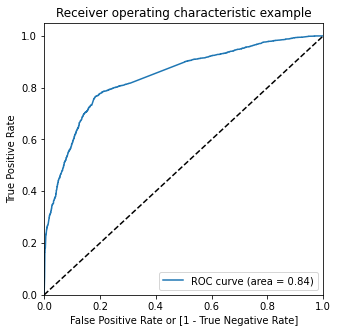

In [211]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

In [212]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.206430,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.230208,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.213783,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.662789,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.749405,7987,1,1,1,1,1,1,1,1,1,0,0


In [213]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.462447  0.988144  0.133163
0.2   0.2  0.637222  0.908831  0.467093
0.3   0.3  0.792474  0.775143  0.803329
0.4   0.4  0.793891  0.706051  0.848912
0.5   0.5  0.788222  0.640229  0.880922
0.6   0.6  0.773736  0.551104  0.913188
0.7   0.7  0.754369  0.445626  0.947759
0.8   0.8  0.728862  0.339330  0.972855
0.9   0.9  0.700362  0.232216  0.993598


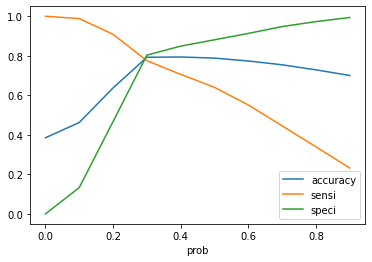

In [214]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [215]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.206430,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.230208,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.213783,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.662789,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.749405,7987,1,1,1,1,1,1,1,1,1,0,0


In [216]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7924736262005984


In [217]:
# Let's take a look at the confusion matrix again 
confusion_after_roc = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion_after_roc

array([[3137,  768],
       [ 550, 1896]], dtype=int64)

In [218]:
# Actual/Predicted     not_converted    converted
        # not_converted        3137      768
        # converted            550       1896 

In [219]:
TP = confusion_after_roc[1,1] # true positive 
TN = confusion_after_roc[0,0] # true negatives
FP = confusion_after_roc[0,1] # false positives
FN = confusion_after_roc[1,0] # false negatives

In [220]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7751430907604252

In [221]:
# Let us calculate specificity
TN / float(TN+FP)

0.8033290653008963

In [222]:
# Calculate false postive rate - predicting conversion when customer did converted
print(FP/ float(TN+FP))

0.1966709346991037


In [223]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7117117117117117


In [224]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8508272308109575


### Precision and Recall

In [225]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3137,  768],
       [ 550, 1896]], dtype=int64)

##### Precision
TP / TP + FP

In [226]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7117117117117117

##### Recall
TP / TP + FN

In [227]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7751430907604252

### Making Predictions on Test set

In [228]:
x_test[['Total Time Spent on Website']] = scaler.fit_transform(x_test[['Total Time Spent on Website']])
x_test = x_test[significant_features]
x_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Specialization_Others,What is your current occupation_Working Professional
3271,0,-0.591008,0,1,0,0,0,0,1,0
1490,0,1.894051,1,0,0,0,0,0,0,1
7936,0,-0.743117,0,1,0,0,0,0,1,0
4216,0,-0.878732,0,0,0,1,0,0,0,0
3830,0,-0.578179,0,0,1,0,0,0,0,0


In [229]:
x_test_sm = sm.add_constant(x_test)

In [230]:
y_test_pred = res.predict(x_test_sm)

In [231]:
y_test_pred[:10]

3271    0.119598
1490    0.974595
7936    0.102771
4216    0.915089
3830    0.191146
1800    0.762247
6507    0.195259
4821    0.320660
4223    0.850665
4714    0.215658
dtype: float64

In [232]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [233]:
# Let's see the head
y_pred_1.head()

,0
3271,0.119598
1490,0.974595
7936,0.102771
4216,0.915089
3830,0.191146


In [234]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [235]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [236]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [237]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [238]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.119598
1,1,1490,0.974595
2,0,7936,0.102771
3,1,4216,0.915089
4,0,3830,0.191146


In [239]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead Score'})

In [240]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead Score'], axis=1)

In [241]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Lead Score
0,3271,0,0.119598
1,1490,1,0.974595
2,7936,0,0.102771
3,4216,1,0.915089
4,3830,0,0.191146


In [242]:
y_pred_final['final_predicted'] = y_pred_final["Lead Score"].map(lambda x: 1 if x > 0.3 else 0)

In [243]:
y_pred_final.head()

,Prospect ID,Converted,Lead Score,final_predicted
0,3271,0,0.119598,0
1,1490,1,0.974595,1
2,7936,0,0.102771,0
3,4216,1,0.915089,1
4,3830,0,0.191146,0


In [244]:
y_pred_final['Lead Score'] = y_pred_final['Lead Score']*100

In [245]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','final_predicted','Lead Score'], axis=1)

# Lead Score Generated by Model

In [246]:
y_pred_final.head()

,Prospect ID,Converted,final_predicted,Lead Score
0,3271,0,0,11.959781
1,1490,1,1,97.459459
2,7936,0,0,10.277135
3,4216,1,1,91.508864
4,3830,0,0,19.114622


In [247]:
y_pred_final.shape

(2723, 4)

In [248]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7947117150201983

In [249]:
confusion_after_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_after_test

array([[1404,  330],
       [ 229,  760]], dtype=int64)

In [250]:
# Actual/Predicted     not_converted    converted
        # not_converted        1404      330
        # converted            229       760 

In [251]:
TP = confusion_after_test[1,1] # true positive 
TN = confusion_after_test[0,0] # true negatives
FP = confusion_after_test[0,1] # false positives
FN = confusion_after_test[1,0] # false negatives

In [252]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7684529828109201

In [253]:
# Let us calculate specificity
TN / float(TN+FP)

0.8096885813148789

In [254]:
# Let's see the precision of our logistic regression model
TP/(TP+FP)

0.6972477064220184

In [255]:
# Let's see the recall of our logistic regression model
TP/(TP+FN)

0.7684529828109201

# Final Model Metrics

### Train Set:
    Overall Accuracy    :    79.24%
    Sensitivity         :    77.51%
    Specificity         :    80.33%
    Precision           :    71.17%
    Recall              :    77.51%

### Test Set:
    Overall Accuracy    :     79.47%
    Sensitivity         :     76.84%
    Specificity         :     80.96%
    Precision           :     69.72%
    Recall              :     76.84%